In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading Data**

In [35]:
titanic_df=pd.read_csv('Titanic-Dataset.csv')

In [36]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# **Data Cleaning**

In [38]:
titanic_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**There are 177 null values in age, 687 in cabin and 2 in Embarked**



- **the cabin column does not give any significant information,hence we gonna remove that column**

In [39]:
titanic_df.drop(columns='Cabin',inplace=True)

- **for null values in age column, we have 890 entries in table and 177 age entries are null, we gonna fill it with median age based on titles (as each Title group will have almost same age)**

In [40]:
# Extract Title from the Name column
titanic_df['Title'] = titanic_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Map rare titles to common ones to avoid tiny groups
mapping = {'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs', 'Lady': 'Mrs',
           'Countess': 'Mrs', 'Dona': 'Mrs', 'Capt': 'Mr', 'Col': 'Mr',
           'Don': 'Mr', 'Dr': 'Mr', 'Major': 'Mr', 'Rev': 'Mr', 'Sir': 'Mr', 'Jonkheer': 'Mr'}
titanic_df['Title'] = titanic_df['Title'].replace(mapping)

# Fill missing Age with the median age of that Title group
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df.groupby('Title')['Age'].transform('median'))


<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-865282698.py:2: SyntaxWarning: invalid escape sequence '\.'
  titanic_df['Title'] = titanic_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)




- **for Embarked, its only 2 values so we going to fill it with mode as thats a port from which most passengers embarked**

In [41]:
# Fill missing Embarked values with the most frequent port
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])


In [42]:
titanic_df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [43]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Mrs


# **Questions**

## **1) Who survived more: males or females?**

we are going to do groupby based on Gender and sum of survived column for total number of surviving

In [45]:
titanic_df.groupby('Sex')['Survived'].sum()

,Survived
Sex,
female,233
male,109


**Interpretation:**

we can see 233 females and 109 males are survived in titanic accident. female survival rate is almost double than males which indicate that while evacuating, females got priority and they survived more than males



---



---



## **2) Did passenger class affect survival chances?**

we are going to do groupby on passenger class and percentage of survived passenger by class

In [69]:
titanic_df.groupby('Pclass')['Survived'].mean().mul(100).round(2)

,Survived
Pclass,
1,62.96
2,47.28
3,24.24


**Interpretation:**

we can see
- 62.96% passengers from class 1 survived.
- 4728% passengers from class 2 survived.
- 24.24% passengers from class 3 survived

so we can see Passenger class clearly affect survival rate, class 1 passenger survive most, then class 2 and then class 3


---



---



## **3) What was the survival rate by age group?**

First we are going to add age groups

In [47]:
def Age_group(x):
  if x>=60:
    return '60+'
  elif x>=50:
    return '50-60'
  elif x>=40:
    return '40-50'
  elif x>=30:
    return '30-40'
  elif x>=20:
    return '20-30'
  else:
    return '<20'

Applying function to dataframe to get new column of age group

In [48]:
titanic_df['Age Group']=titanic_df['Age'].apply(Age_group)

In [49]:
#Checking if function is applied or not
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Age Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,20-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,30-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,20-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,30-40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,30-40
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,Q,Mr,30-40
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Mr,50-60
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Master,<20
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Mrs,20-30
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Mrs,<20


In [52]:
titanic_df.groupby('Age Group')['Survived'].value_counts()

Age Group  Survived
20-30      0           157
           1            99
30-40      0           203
           1           101
40-50      0            55
           1            34
50-60      0            28
           1            20
60+        0            19
           1             7
<20        0            87
           1            81
Name: count, dtype: int64

In [57]:
titanic_df.groupby('Age Group')['Survived'].mean().mul(100).round(2)

,Survived
Age Group,
20-30,38.67
30-40,33.22
40-50,38.20
50-60,41.67
60+,26.92
<20,48.21


**Interpretation:**

from above, we can say that old peoples and teens has highest survival rate compare to other, which indicated that children and old ones got priority for evacuation. 20-30,30-40 and 40-50 has almost same survival rate and 60+ survive least maybe due to being too old


---

---





# Visualizations

- **Bar chart of survival by gender.**

This bar chart shows survival rate based on gender

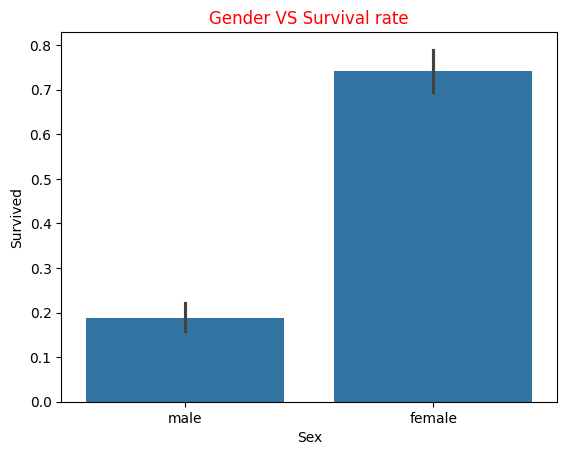

In [65]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)
plt.title("Gender VS Survival rate", c='r')
plt.show()

**Interpetation:**

From bar chart there huge gap between survival rate of Male's and female's.


---



---



- **Bar chart of survival by class.**

This Bar chart shows surviavle rate based on class

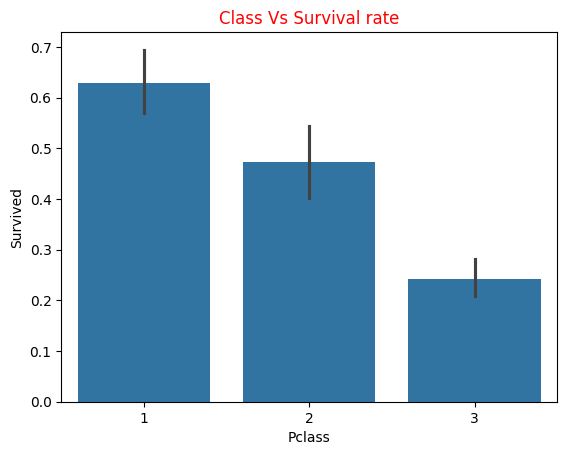

In [68]:
plt.figure()
sns.barplot(x='Pclass',y='Survived',data=titanic_df)
plt.title('Class Vs Survival rate',c='r')
plt.show()

**Interpretation:**

Class 1 passengers survived most then class 2 and then class 3. whcih indicate that class 1 passengers get priority while evacuation over other classes


---

---





- **Histogram of passenger ages.**

This histogram shows distribution of age of passengers

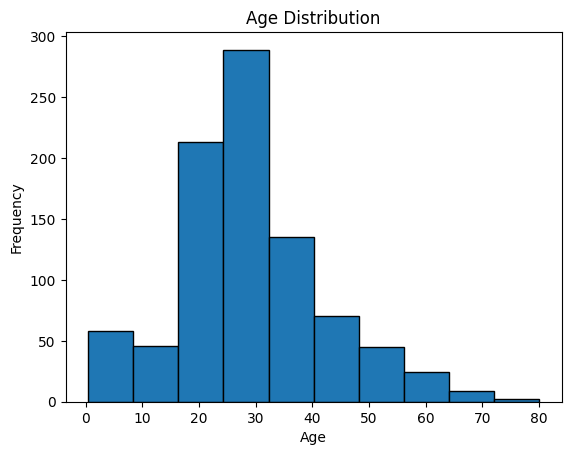

In [74]:
plt.figure()
data=titanic_df['Age']
plt.hist(data,bins=10,edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Interpretation:**

most of the passengers are from Age 20 to Age 40. means Middle age peopels are more in ship


---



---



# Conclusion

- Female survival rate is more than that of male
- Class 1 passengers survive more, then Class2 2 and then Class 3
- Children and old peoples got priority for evacuation as their survival rate is high compare to other age groups